# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [44]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Read the Mapbox API key
dotenv_path = Path('../.env')
load_dotenv(dotenv_path=dotenv_path)
map_box_api = os.getenv("map_box_api")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [46]:
# Read the census data into a Pandas DataFrame
file_path = Path("../Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [47]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_by_year_mean = sfo_data.groupby(['year']).mean()
sfo_data_by_year_mean.drop(labels=['sale_price_sqr_foot', 'gross_rent'], axis=1, inplace=True)

# Calculate min, max, std dev
sfo_data_by_year_min = min(sfo_data_by_year_mean['housing_units'])
sfo_data_by_year_max = max(sfo_data_by_year_mean['housing_units'])
sfo_data_by_year_std = np.std(sfo_data_by_year_mean['housing_units'])

In [48]:
# Save the dataframe as a csv file
save_file_path = Path("../Data/sfo_data_by_year_mean.csv")
to_csv_dataframe = sfo_data_by_year_mean
to_csv_dataframe.to_csv(save_file_path, index="year")

In [49]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
plot_sfo_data_by_year_mean = sfo_data_by_year_mean.hvplot.bar(title='Housing Units in San Francisco from 2010 to 2016', xlabel="Housing Units", ylabel='Year', ylim=(sfo_data_by_year_min-2000,sfo_data_by_year_max+2000), yformatter='%.0f', rot=90)
plot_sfo_data_by_year_mean


:Bars   [year]   (housing_units)

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [50]:
# Calculate the average sale price per square foot and average gross rent
avg_cost_by_year = sfo_data.groupby(['year']).mean()
avg_cost_by_year.drop(labels=['housing_units'], axis=1, inplace=True)
avg_cost_by_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [70]:
# Line chart for average sale price per square foot
plot_avg_sale_price_by_year = avg_cost_by_year['sale_price_sqr_foot'].hvplot.line(title='AveragePrice per SqFt by Year', xlabel='Year', ylabel='Price Per Sqft')
plot_avg_sale_price_by_year

:Curve   [year]   (sale_price_sqr_foot)

In [52]:
# Line chart for average montly rent
plot_avg_gross_rent_by_year = avg_cost_by_year['gross_rent'].hvplot.line(title='Average Gross Rent by Year', xlabel='Year', ylabel='Price Per Sqft')
plot_avg_gross_rent_by_year

:Curve   [year]   (gross_rent)

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [53]:
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_price_by_nbhd = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
avg_price_by_nbhd.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [54]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

# Define function that creates line chart
def create_nbhd_line_chart(neighborhood):
    nbhd_label = neighborhood
    df = avg_price_by_nbhd[avg_price_by_nbhd['neighborhood'] == neighborhood]
    df.drop(labels=['neighborhood', 'housing_units', 'gross_rent'], axis=1, inplace=True)
    df = df.set_index('year')
    line_chart = df.hvplot.line()
    line_chart = df.hvplot.line(title='Average Sale Price per Square Feet in ' + neighborhood, xlabel='Year', ylabel='Price Per Sqft')
    
    return line_chart

# Push a sorted list of unique neighborhoods into the interact f(x) to create dropdown
all_nbhds = avg_price_by_nbhd['neighborhood'].value_counts().index.sort_values()
interact(create_nbhd_line_chart, neighborhood=all_nbhds)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive03637')

In [95]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

# Define function that creates line chart
def create_nbhd_line_chart(neighborhood):
    df = avg_price_by_nbhd[avg_price_by_nbhd['neighborhood'] == neighborhood]
    df.drop(labels=['neighborhood', 'housing_units', 'sale_price_sqr_foot'], axis=1, inplace=True)
    df = df.set_index('year')
    line_chart = df.hvplot.line()
    line_chart = df.hvplot.line(title='Average Gross Rent Per Year in ' + neighborhood, xlabel='Year', ylabel='Price Per Sqft')
    
    return line_chart

# Push a sorted list of unique neighborhoods into the interact f(x) to create dropdown
all_nbhds = avg_price_by_nbhd['neighborhood'].value_counts().index.sort_values()
interact(create_nbhd_line_chart, neighborhood=all_nbhds)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive09755')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [56]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_sale_price_by_nbhd = sfo_data.groupby(['neighborhood']).mean().sort_values(by='sale_price_sqr_foot', axis=0, ascending=False)
top_10 = avg_sale_price_by_nbhd.head(10).drop(['housing_units','gross_rent'], axis=1)
top_10

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [57]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_bar_plot = top_10.hvplot.bar(title='Top 10 Expensive Neighborhoods in SFO', xlabel='Neighborhood', ylabel='Avg. Sale Price per Square Feet', rot=90)
top_10_bar_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [58]:
# Preview data from previous dataframe that grouped by year and neighborhood
avg_price_by_nbhd.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [59]:
# 
def cost_vs_rent(neighborhood):
    df = avg_price_by_nbhd[avg_price_by_nbhd['neighborhood'] == neighborhood]
    df.drop(labels=['neighborhood', 'housing_units'], axis=1, inplace=True)
    df = df.set_index('year')
    bar_chart = df.hvplot.bar()
    bar_chart = df.hvplot.bar(title='Average Price Per Sqft vs. Average Monthly Rent in ' + neighborhood, xlabel='Yaer', ylabel='US Dollars', rot=90, height=500)
    
    return bar_chart

interact(cost_vs_rent, neighborhood=all_nbhds)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Bars, name='interactive04294')

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

In [60]:
# Load neighborhoods coordinates data
coor_path = Path("../Data/neighborhoods_coordinates.csv")
coor_data = pd.read_csv(coor_path)

# Rename neighborhood column to match both dfs
coor_data.rename(columns={'Neighborhood': 'neighborhood'}, inplace=True)

# Merge dfs and drop year, then groupby neighborhood and get avg vals
combined_df = pd.merge(avg_price_by_nbhd, coor_data, on='neighborhood')
combined_df.drop(labels=['year'], axis=1, inplace=True)
combined_df = combined_df.groupby(['neighborhood']).mean().reset_index()
combined_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


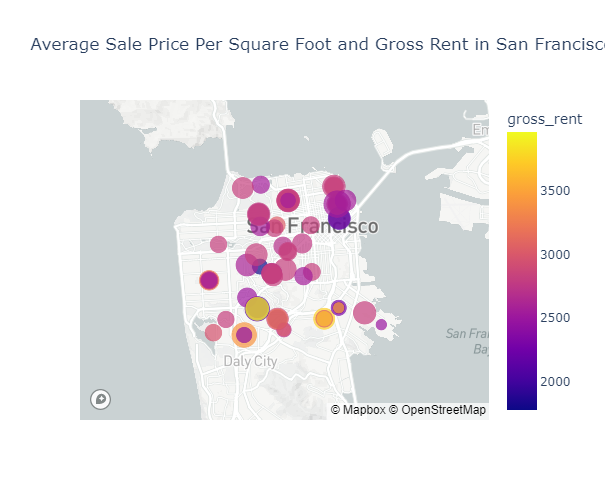

In [61]:
# Create a scatter mapbox to analyze neighborhood info
plot1 = px.scatter_mapbox(
    combined_df,
    lat='Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent',
    zoom=10,
    height=500,
    width=600,
    title='Average Sale Price Per Square Foot and Gross Rent in San Francisco'
)

plot1.show()

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

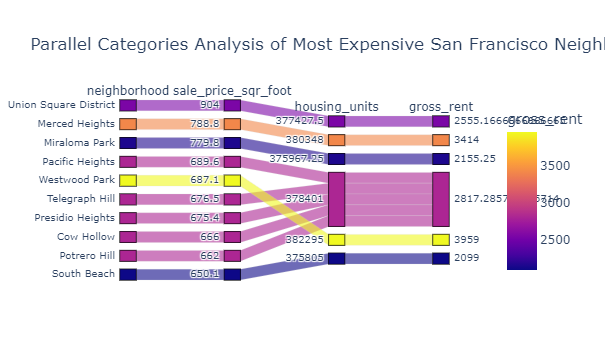

In [62]:
# Fetch the data from all expensive neighborhoods per year.
most_exp = sfo_data.groupby(['neighborhood']).mean().sort_values(by='sale_price_sqr_foot', axis=0, ascending=False)
most_exp = most_exp.reset_index().head(10)
most_exp['sale_price_sqr_foot'] = most_exp['sale_price_sqr_foot'].round(1)

#Parallel Categories Plot
par_plot = px.parallel_categories(most_exp,
    color='gross_rent',
    title='Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods'
                                 )

par_plot.show()

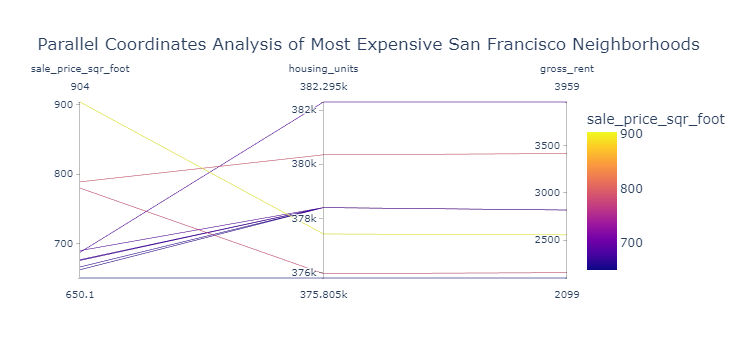

In [63]:
# Parallel Coordinates Plot
par_cord_plot = px.parallel_coordinates(most_exp,
    color='sale_price_sqr_foot',
    title='Parallel Coordinates Analysis of Most Expensive San Francisco Neighborhoods'
                                       )

par_cord_plot.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

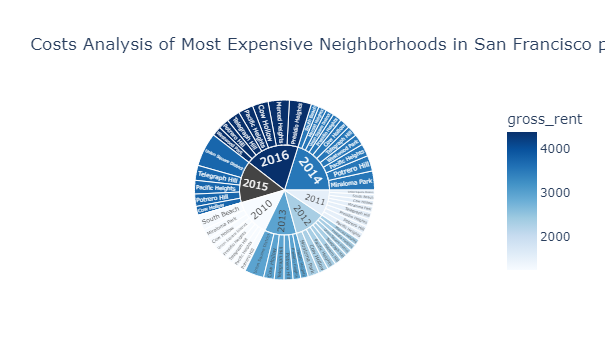

In [64]:
most_exp_by_year = avg_price_by_nbhd[avg_price_by_nbhd["neighborhood"].isin(most_exp["neighborhood"])]

# Sunburst Plot
sunburst_plot = px.sunburst(most_exp_by_year,
    path=['year','neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    title='Costs Analysis of Most Expensive Neighborhoods in San Francisco per Year',
    color_continuous_scale='Blues'
    
    
)

sunburst_plot.show()



## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [106]:
# Define Panel Visualization Functions
def housing_units_per_year(sfo_data):
    """Housing Units Per Year."""
    
    sfo_data_by_year_mean = sfo_data.groupby(['year']).mean()
    sfo_data_by_year_mean.drop(labels=['sale_price_sqr_foot', 'gross_rent'], axis=1, inplace=True)

    sfo_data_by_year_min = min(sfo_data_by_year_mean['housing_units'])
    sfo_data_by_year_max = max(sfo_data_by_year_mean['housing_units'])
    sfo_data_by_year_std = np.std(sfo_data_by_year_mean['housing_units'])

    housing_units_per_year_plot = sfo_data_by_year_mean.hvplot.bar(title='Housing Units in San Francisco from 2010 to 2016', xlabel="Housing Units", ylabel='Year', ylim=(sfo_data_by_year_min-2000,sfo_data_by_year_max+2000), yformatter='%.0f', rot=90)
    
    return housing_units_per_year_plot

def average_gross_rent(avg_cost_by_year):
    """Average Gross Rent in San Francisco Per Year."""
    
    plot_avg_gross_rent_by_year = avg_cost_by_year['gross_rent'].hvplot.line(title='Average Gross Rent by Year', xlabel='Year', ylabel='Price Per Sqft')

    return plot_avg_gross_rent_by_year


def average_sales_price(avg_cost_by_year):
    """Average Sales Price Per Year."""
    
    plot_avg_sale_price_by_year = avg_cost_by_year['sale_price_sqr_foot'].hvplot.line(title='AveragePrice per SqFt by Year', xlabel='Year', ylabel='Price Per Sqft')
    
    return plot_avg_sale_price_by_year



def average_price_by_neighborhood(avg_price_by_nbhd, neighborhood):
    """Average Prices by Neighborhood."""
    
    df = avg_price_by_nbhd[avg_price_by_nbhd['neighborhood'] == neighborhood]
    df.drop(labels=['neighborhood', 'housing_units', 'sale_price_sqr_foot'], axis=1, inplace=True)
    df = df.set_index('year')
    line_chart = df.hvplot.line()
    line_chart = df.hvplot.line(title='Average Gross Rent Per Year in ' + neighborhood, xlabel='Year', ylabel='Price Per Sqft')

    
    return line_chart

# Push a sorted list of unique neighborhoods into the interact f(x) to create dropdown
    all_nbhds = avg_price_by_nbhd['neighborhood'].value_counts().index.sort_values()
    interact(create_nbhd_line_chart, neighborhood=all_nbhds)



def top_most_expensive_neighborhoods(top_10):
    """Top 10 Most Expensive Neighborhoods."""

    top_10_bar_plot = top_10.hvplot.bar(title='Top 10 Expensive Neighborhoods in SFO', xlabel='Neighborhood', ylabel='Avg. Sale Price per Square Feet', rot=90)
    
    return top_10_bar_plot


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!

    
    
def parallel_coordinates(most_exp):
    """Parallel Coordinates Plot."""

    par_cord_plot = px.parallel_coordinates(most_exp,
    color='sale_price_sqr_foot',
    title='Parallel Coordinates Analysis of Most Expensive San Francisco Neighborhoods'
                                           )
                                            
    return par_cord_plot
                    



def parallel_categories(most_exp):
    """Parallel Categories Plot."""
    
    par_plot = px.parallel_categories(most_exp,
    color='gross_rent',
    title='Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods'
                                 )

    return par_plot



def neighborhood_map(combined_df):
    """Neighborhood Map."""

    plot1 = px.scatter_mapbox(
        combined_df,
        lat='Lat',
        lon='Lon',
        size='sale_price_sqr_foot',
        color='gross_rent',
        zoom=10,
        height=500,
        width=600,
        title='Average Sale Price Per Square Foot and Gross Rent in San Francisco'
    )
    
    return plot1


def sunburst(most_exp_by_year):
    """Sunburst Plot."""
    
    sunburst_plot = px.sunburst(most_exp_by_year,
    path=['year','neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    title='Costs Analysis of Most Expensive Neighborhoods in San Francisco per Year',
    color_continuous_scale='Blues'
                                )
    
    return sunburst_plot
    


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [108]:
# Create a Title for the Dashboard
welcome_text = "This dashboard presetns a visual analysis of historical prices of house units, sale price per square foot and gross rent in San Francisco, California from 2010 to 2016. You can navigate through the tabs above to epxlore more details about the evolution of the real estate market on The Golden City across these years"

# Create columns/rows for each tab

welcome_column = pn.Column(
    "# Real Estate Analysis of San Francisco from 2010 to 2016", welcome_text, neighborhood_map(combined_df)
)

yrly_mkt_analysis = pn.Row(
    housing_units_per_year(sfo_data),
    average_gross_rent(avg_cost_by_year),
    average_sales_price(avg_cost_by_year)
)

nbhd_analysis = pn.Column(
    top_most_expensive_neighborhoods(top_10)
)

par_analysis = pn.Column(
    parallel_coordinates(most_exp),
    parallel_categories(most_exp)
)

sun_analysis = pn.Column(
    sunburst(most_exp_by_year)
)

#yrly_mkt_anal.append(average_gross_rent(avg_cost_by_year))

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", welcome_column),
    ("Yearly Market Analysis", yrly_mkt_analysis),
    ("Neighborhood Analysis", nbhd_analysis),
    ("Parallel Plots Analysis", par_analysis),
    ("Sunburt Plot Analysis", sun_analysis)
)


# Create the dashboard
tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
    [1] Row
        [0] HoloViews(Bars)
        [1] HoloViews(Curve)
        [2] HoloViews(Curve)
    [2] Column
        [0] HoloViews(Bars)
    [3] Column
        [0] Plotly(Figure, visible=False)
        [1] Plotly(Figure, visible=False)
    [4] Column
        [0] Plotly(Figure, visible=False)